# Proyecto 1
## Entrega 1
Andrés Eduardo Villota Vega 201914885
Santiago Latorre Munar 202111851

# Entendimiento del negocio y enfoque analítico

### Objetivo
El propósito del proyecto es proporcionar las herramientas necesarias para llevar a cabo una clasificación automatizada de los textos recopilados por el UNFPA durante su labor de seguimiento y evaluación de las políticas implementadas en Colombia. El objetivo principal es desarrollar modelos de aprendizaje automático capaces de categorizar estos textos en función de los Objetivos de Desarrollo Sostenible (ODS) a los que se refieren. Este enfoque ofrecerá ventajas significativas para el UNFPA, ya que el proceso actual de clasificación se realiza manualmente, requiriendo la supervisión de un experto para identificar el ODS al que corresponde cada texto.

La automatización de este proceso permitirá al UNFPA agilizar y optimizar el seguimiento de las políticas implementadas en Colombia. Además, facilitará una comprensión más profunda del impacto de las iniciativas en las poblaciones, lo que posibilitará tomar decisiones informadas sobre la continuidad o la modificación de dichas políticas.

## ODS
Para entender el impacto que puede tener este proyecto es necesario entender primero que son los Objetivos de Desarrollo Sostenible (ODS), en especial el 3, 4 y 5 que serán tratados en este proyecto, y el impacto que tendrían en la población colombiana.
Los Objetivos de Desarrollo Sostenible son en total 17 objetivos establecidos por las Naciones Unidas en 2015 como parte de la agenda 2030. Estos objetivos buscan mejorar la calidad de vida de las personas mediante acciones e iniciativas que reduzcan la pobreza, cuiden el planeta y la disminución de las desigualdades. 

![S-SDG-Poster_-Letter.jpg](attachment:ab3e4cd7-b778-48a2-86a7-c34dddd99335.jpg)

### ODS 3: Salud y Bienestar
El ODS 3 busca promover una vida sana y promover el bienestar para todos en todas las edades. Este objetivo ha cobrado mayor relevancia en los últimos años debido a la pandemia de COVID-19, que afectó a la población mundial. Además, es de vital importancia en Colombia, donde el sistema de salud presenta deficiencias significativas que tienen un impacto negativo en la salud y el bienestar de las poblaciones más vulnerables. Por lo tanto, es crucial implementar iniciativas destinadas a cumplir con este objetivo en Colombia para mejorar la calidad de vida de los colombianos. Por lo tanto, es fundamental realizar un seguimiento continuo de estas iniciativas a través de testimonios y evaluar si están teniendo un impacto positivo en la población.

![download.png](attachment:de06c0ed-cd30-45ad-9373-d11f27ea73b4.png)

### ODS 4: Educación de Calidad
El ODS 4 busca garantizar una educación inclusiva, equitativa y de calidad y promover oportunidades de aprendizaje durante toda la vida para todos. Este objetivo es bastante importante ya que la educación es un factor clave para acabar con la pobreza, pues es importante para que las personas progresen y tenga mayores y mejores oportunidades laborales y en consecuencia una mejor calidad de vida. Este objetivo es importante para Colombia que siempre ha tenido bajos resultados en los rankings internacionales que califican el nivel de educación de los países. A pesar de los esfuerzos del gobierno nacional por mejorar la situación aún falta mucho para lograr tener una educación de calidad para todos. Por lo tanto, es importante que la ONU por medio de la UNFPA ayude implementando programas de mejora en la educación del país y es importante tener un control y seguimiento de estos programas. 
https://datosmacro.expansion.com/estado/gasto/educacion/colombia#:~:text=En%202020%2C%20Colombia%20descendi%C3%B3%20en,del%20puesto%2035%20al%2037.

![download.png](attachment:af7da07d-472a-4bc2-a64b-311b31414da5.png)

### ODS 5: Igualdad de género
El ODS 5 busca lograr la igualdad entre los géneros y empoderar a todas las mujeres y las niñas. Este objetivo es importante ya que durante muchos años los hombres han gozados de beneficios y ventajas frente a las mujeres por el simple hecho de ser hombres. Es importante garantizar la igualdad de género ya que es uno de los pilares claves para garantizar el desarrollo de una población pacífica y próspera. A pesar de que Colombia ha tenido grandes avances respecto a este objetivo, aun falta cerrar muchas brechas para garantizar las mismas condiciones para hombres y mujeres. Es importante generar espacios e iniciativas de apoyo para las mujeres en Colombia y llevar un seguimiento de esta población y los avances con el objetivo de igualdad de género. 
https://colombia.unwomen.org/es/onu-mujeres-en-colombia/las-mujeres-en-colombia#:~:text=Colombia%20ha%20ratificado%20todos%20los,derechos%20humanos%20de%20las%20mujeres.

![download.png](attachment:9f345b76-51e5-4090-a669-465bdd56b430.png)

## Enfoque analítico
Dadas las necesidades de UNFPA de saber en que categoría estan clasificados cada uno de los textos suministrados y teniendo en cuenta la base de datos que se nos da con las etiquetas del ODS al cual corresponde cada una se decidio darle el siguiente enfoque analítico para el problema actual:

Tipo de aprendizaje: Supervisado

Tarea de aprendizaje: Clasificación

Técnica de aprendizaje: Arbol de decisión

Este enfoque va a permitir cumplir con la meta del negocio de determinar el ODS del texto relacionado, es decir con base en los testimonios de la población saber que ODS se está buscando resolver por medio de las políticas que se están implementando. 

# Entendimiento y preparación de los datos
## Instalación e importación de librerías

In [1]:
# Instalación de librerias
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
from ydata_profiling import ProfileReport


import re, string, unicodedata
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import (
    ConfusionMatrixDisplay, RocCurveDisplay,
    roc_auc_score, precision_score, recall_score, f1_score
)
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB

from num2words import num2words

from collections import Counter
import re
from joblib import dump, load

c:\Users\santi\mambaforge\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
c:\Users\santi\mambaforge\lib\site-packages\visions\backends\shared\nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


In [2]:
pd.set_option("display.max_colwidth", None)

## Perfilamiento y entendimiento de datos
## Carga de los datos

In [3]:
data=pd.read_excel('cat_345.xlsx')

## Entendimiento de los datos

In [4]:
textos = data.copy()
textos['Conteo'] = [len(x) for x in textos['Textos_espanol']]
textos["Mas repetida"] = [Counter(re.findall(r'\w+', x.lower())).most_common(1)[0][0] for x in textos["Textos_espanol"]]
textos['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in textos['Textos_espanol']]
textos['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in textos['Textos_espanol']]

# Se realiza un perfilamiento de los datos con la librería pandas profiling
ProfileReport(textos)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Preparación de datos
### Limpieza de datos

Para garantizar resultados precisos y consistentes, es necesario homogenizar los textos que se van a utilizar tanto para la preparación como para la aplicación del modelo de clasificación. Esto implica cambiar todo al mismo formato y mantener solo aquella información que pueda ser de utilidad para la construcción del moodelo (por ejemplo, elementos como puntuación y palabras vacías no aportan nada para el proceso de aprendizaje, pero si pueden llegar a afectar negativamente la precisión)

In [5]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""    
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = num2words(word, lang='es')            
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    
    new_words = []
    stop_words = set(stopwords.words('spanish'))
    
    for word in words:
        if word not in stop_words:
            new_words.append(word)
    return new_words

def preprocessing(words):
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

### Tokenización

In [6]:
data['palabras'] = data['Textos_espanol'].apply(word_tokenize).apply(preprocessing) #Aplica la eliminación del ruido
data.head()

,Textos_espanol,sdg,palabras
0,"Por ejemplo, el nÃºmero de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparaciÃ³n con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la poblaciÃ³n ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El nÃºmero de recetas que no pudieron ser surtidas en su totalidad por un farmacÃ©utico debido a la falta de existencias es de 33% dentro del SP en comparaciÃ³n con 14% dentro del IMSS segÃºn los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas mÃ¡s altas de recetas surtidas). Ambas cifras se encuentran entre las mÃ¡s altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",3,"[ejemplo, naomero, consultas, externas, especialistas, trescientos diecinueve, cada, mil, derechohabientes, sp, comparacia3n, trescientos treinta y ocho, seiscientos veinte, cada, mil, derechohabientes, imss, issste, respectivamente, si, bien, diferencias, pueden, reflejar, necesidad, desigual, poblacia3n, ligeramente, mayor, issste, pueden, justificarse, manera, naomero, recetas, pudieron, ser, surtidas, totalidad, farmacautico, debido, falta, existencias, treinta y tres, dentro, sp, comparacia3n, catorce, dentro, imss, segaon, datos, encuesta, aunque, propias, cifras, institutos, ss, sugieren, tasas, mas, altas, recetas, surtidas, ambas, cifras, encuentran, mas, altas, ocde, gasto, bolsillo, reducido, significativamente, ultima, decada, pesar, esfuerzos, lograr, cobertura, sanitaria, universal, traves, reforma, sp]"
1,"En 2007, el gobierno central financió directamente solo el 0,3% del gasto total en salud, pero realizó transferencias específicas para el gasto en salud que ascendieron a otro 5,6% del gasto total. La mayor parte del gasto presupuestario en salud lo realizan los gobiernos de los condados. Por lo tanto, los condados pobres solo pueden ofrecer un bajo nivel de atención a la población local. El gobierno provincial proporciona subsidios del lado de la oferta a los hospitales.",3,"[dos mil siete, gobierno, central, financio, directamente, solo, 03, gasto, total, salud, realizo, transferencias, especificas, gasto, salud, ascendieron, 56, gasto, total, mayor, parte, gasto, presupuestario, salud, realizan, gobiernos, condados, condados, pobres, solo, pueden, ofrecer, bajo, nivel, atencion, poblacion, local, gobierno, provincial, proporciona, subsidios, lado, oferta, hospitales]"
2,"Claramente, hay muchos otros factores en juego, en particular, una variedad de barreras y determinantes sociales. Estos pueden estar relacionados con el género, la clase, la etnia, la casta, el idioma y la religión, y surgen de estructuras, normas y procesos sociales arraigados que aceptan e incluso fomentan distribuciones injustas de la riqueza y los recursos sociales. Por ejemplo, las personas que viven con el VIH y algunas otras enfermedades crónicas enfrentan altos niveles de estigma y discriminación que dificultan su acceso a pruebas médicas, tratamiento, atención y apoyo. Por lo tanto, los gobiernos que buscan mejorar los estándares de salud querrán mejorar la condición de la mujer, brindar servicios de salud reproductiva efectivos, implementar programas integrales de lactancia materna en línea con las recomendaciones actuales y aumentar las presiones comunitarias contra el aborto selectivo por sexo. Las personas pobres, que carecen de educación e información, o de fondos para opciones más saludables, son más vulnerables al impacto de las ENT que los ricos y es probable que mueran antes. Directa e indirectamente, las ENT tendrán impactos de gran alcance en el progreso hacia los ODM.",3,"[claramente, factores, juego, particular, variedad, barreras, determinantes, sociales, 

Un paso adicional que se puede realizar para garantizar resultados óptimos es reducir la dimensionalidad de la información. Para esto se utiliza funciones de normalización de texto y procesamiento de lenguaje natural que reduzcan las palabras a su forma raíz y así variaciones de la misma estén representadas por el mismo vector. (Por ejemplo, que "consistente" sea representado de la misma forma que "consistentemente")

### Normalización 

In [7]:
def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def stem_and_lemmatize(words):
    stems = stem_words(words)
    lemmas = lemmatize_verbs(words)
    return stems + lemmas


data['palabras'] = data['palabras'].apply(stem_and_lemmatize) #Aplica lematización y Eliminación de Prefijos y Sufijos.
data.head()

,Textos_espanol,sdg,palabras
0,"Por ejemplo, el nÃºmero de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparaciÃ³n con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la poblaciÃ³n ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El nÃºmero de recetas que no pudieron ser surtidas en su totalidad por un farmacÃ©utico debido a la falta de existencias es de 33% dentro del SP en comparaciÃ³n con 14% dentro del IMSS segÃºn los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas mÃ¡s altas de recetas surtidas). Ambas cifras se encuentran entre las mÃ¡s altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",3,"[ejemplo, naomero, consulta, externa, especialista, trescientos diecinueve, cad, mil, derechohaby, sp, comparacia3n, trescientos treinta y ocho, seiscientos veinte, cad, mil, derechohaby, imss, issst, respectiva, si, bien, diferencia, pued, reflej, necesidad, desig, poblacia3n, ligera, may, issst, pued, justificars, maner, naomero, receta, pudieron, ser, surtida, totalidad, farmacautico, debido, falt, existencia, treinta y tres, dentro, sp, comparacia3n, catorc, dentro, imss, segaon, dato, encuest, aunqu, propia, cifra, instituto, ss, sugy, tasa, mas, alta, receta, surtida, amba, cifra, encu, mas, alta, ocd, gasto, bolsillo, reducido, significativa, ultim, decad, pes, esfuerzo, logr, cobertur, sanitar, univers, trav, reform, sp, ejemplo, naomero, consultas, externas, especialistas, trescientos diecinueve, cada, mil, derechohabientes, sp, comparacia3n, trescientos treinta y ocho, seiscientos veinte, cada, mil, ...]"
1,"En 2007, el gobierno central financió directamente solo el 0,3% del gasto total en salud, pero realizó transferencias específicas para el gasto en salud que ascendieron a otro 5,6% del gasto total. La mayor parte del gasto presupuestario en salud lo realizan los gobiernos de los condados. Por lo tanto, los condados pobres solo pueden ofrecer un bajo nivel de atención a la población local. El gobierno provincial proporciona subsidios del lado de la oferta a los hospitales.",3,"[dos mil siete, gobierno, cent, financio, directa, solo, 03, gasto, tot, salud, realizo, transferencia, especifica, gasto, salud, ascendieron, 56, gasto, tot, may, part, gasto, presupuestario, salud, real, gobierno, condado, condado, pobr, solo, pued, ofrec, bajo, nivel, at, poblac, loc, gobierno, provint, proporcion, subsidio, lado, ofert, hospit, dos mil siete, gobierno, central, financio, directamente, solo, 03, gasto, total, salud, realizo, transferencias, especificas, gasto, salud, ascendieron, 56, gasto, total, mayor, parte, gasto, presupuestario, salud, realizan, gobiernos, condados, condados, pobres, solo, pueden, ofrecer, bajo, nivel, atencion, poblacion, local, gobierno, provincial, proporciona, subsidios, lado, oferta, hospitales]"
2,"Claramente, hay muchos otros factores en juego, en particular, una variedad de barreras y determinantes sociales. Estos pueden estar relacionados con el género, la clase, la etnia, la casta, el idioma y la religión, y surgen de estructuras, normas y procesos sociales arraigados que aceptan e incluso fomentan distribuciones injustas de la riqueza y los recursos sociales. Por ejemplo, las personas que viven con el VIH y algunas otras enfermedades crónicas enfrentan altos niveles de estigma y discriminación que dificultan su acceso a pruebas médicas, tratamiento, atención y apoyo. Por lo tanto, los gobiernos que buscan mejorar los estándares de salud querrán mejorar la condición de la mujer, brindar servicios de salud reproductiva efectivos, implementar programas integrales de lactancia materna en línea con las recomendaciones actuales y aum

Habiendo realizado estos pasos, ya se cuenta con un conjunto de datos óptimo para construir modelos de clasificación a continuación se evidencia una pequeña visualización del cambio realizado al comparar la columna "Textos_espanol" y "palabras"

### Seleccion de campos

In [8]:
data['palabras'] = data['palabras'].apply(lambda x: ' '.join(map(str, x)))
data

,Textos_espanol,sdg,palabras
0,"Por ejemplo, el nÃºmero de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparaciÃ³n con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la poblaciÃ³n ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El nÃºmero de recetas que no pudieron ser surtidas en su totalidad por un farmacÃ©utico debido a la falta de existencias es de 33% dentro del SP en comparaciÃ³n con 14% dentro del IMSS segÃºn los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas mÃ¡s altas de recetas surtidas). Ambas cifras se encuentran entre las mÃ¡s altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",3,ejemplo naomero consulta externa especialista trescientos diecinueve cad mil derechohaby sp comparacia3n trescientos treinta y ocho seiscientos veinte cad mil derechohaby imss issst respectiva si bien diferencia pued reflej necesidad desig poblacia3n ligera may issst pued justificars maner naomero receta pudieron ser surtida totalidad farmacautico debido falt existencia treinta y tres dentro sp comparacia3n catorc dentro imss segaon dato encuest aunqu propia cifra instituto ss sugy tasa mas alta receta surtida amba cifra encu mas alta ocd gasto bolsillo reducido significativa ultim decad pes esfuerzo logr cobertur sanitar univers trav reform sp ejemplo naomero consultas externas especialistas trescientos diecinueve cada mil derechohabientes sp comparacia3n trescientos treinta y ocho seiscientos veinte cada mil derechohabientes imss issste respectivamente si bien diferencias pueden reflejar necesidad desigual poblacia3n ligeramente mayor issste pueden justificarse manera naomero recetas pudieron ser surtidas totalidad farmacautico debido falta existencias treinta y tres dentro sp comparacia3n catorce dentro imss segaon datos encuesta aunque propias cifras institutos ss sugieren tasas mas altas recetas surtidas ambas cifras encuentran mas altas ocde gasto bolsillo reducido significativamente ultima decada pesar esfuerzos lograr cobertura sanitaria universal traves reforma sp
1,"En 2007, el gobierno central financió directamente solo el 0,3% del gasto total en salud, pero realizó transferencias específicas para el gasto en salud que ascendieron a otro 5,6% del gasto total. La mayor parte del gasto presupuestario en salud lo realizan los gobiernos de los condados. Por lo tanto, los condados pobres solo pueden ofrecer un bajo nivel de atención a la población local. El gobierno provincial proporciona subsidios del lado de la oferta a los hospitales.",3,dos mil siete gobierno cent financio directa solo 03 gasto tot salud realizo transferencia especifica gasto salud ascendieron 56 gasto tot may part gasto presupuestario salud real gobierno condado condado pobr solo pued ofrec bajo nivel at poblac loc gobierno provint proporcion subsidio lado ofert hospit dos mil siete gobierno central financio directamente solo 03 gasto total salud realizo transferencias especificas gasto salud ascendieron 56 gasto total mayor parte gasto presupuestario salud realizan gobiernos condados condados pobres solo pueden ofrecer bajo nivel atencion poblacion local gobierno provincial proporciona subsidios lado oferta hospitales
2,"Claramente, hay muchos otros factores en juego, en particular, una variedad de barreras y determinantes sociales. Estos pueden estar relacionados con el género, la clase, la etnia, la casta, el idioma y la religión, y surgen de estructuras, normas y procesos sociales arraigados que aceptan e incluso fomentan distribuciones injustas de la riqueza y los recursos sociales. Por ejemplo, las personas que viven con el VIH y algunas otras enfermedades crónicas enfrentan altos n

Se procede a separar el conjunto de datos en train y test como es usual en tareas de aprendizaje supervisado, con el fin de poder realizar una evaluación optima del desempeño del modelo construido.

### Separación de los datos en conjunto de entrenamiento y testing

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data[["palabras"]], data["sdg"], test_size=0.3, stratify=data["sdg"], random_state=1)
X_train.shape

(2100, 1)

### Vectorizacion

Se probarán 3 diferentes algoritmos para realizar la vectorización, esto con el fin de garantizar la construcción del modelo más preciso posible:

* Bag of Words: Una técnica bastante simple que representa la información como una colección de palabras sin considerar el orden o la estructura de esas palabras dentro del documento. Sus principales ventajas son la simplicidad, la versatilidad y la eficiencia, mientras que su principal desventaja es la pérdida de significado que, dependiendo del contexto, puede ser importante.

* TF-IDF: Una técnica que cuantifica la importancia de los términos (tanto palabras como frases) dentro de un documento, y la compara con otros documentos. Esto con el fin de determinar términos discriminativos que diferencien un texto de otro (por ejemplo, terminos que se repitan en una gran cantidad de documentos proveen menos información con respecto a la categoría del documento que otros que solo se vean en un tipo de categoría). Esta técnica es particularmente útil cuando se manejan documentos donde el lenguaje utilizado difiera mucho de una categoría a otra, pues le resultará sencillo encontrar los términos discriminativos, y con base a ello realizar predicciones acertadas.

* Doc2Vec: Una extensión del modelo Word2Vec utilizado para el procesamiento del lenguaje natural. Mientras que Word2Vec está diseñado para aprender representaciones vectoriales de palabras, Doc2Vec aprende representaciones vectoriales de documentos enteros o parrafos. Logrando capturar el significado semántico de los documentos en un espacio vectorial continuo.
Esta herramienta es muy útil cuando se trabaja en aplicaciones donde el contenido y el contexto del documento es importante para realizar la tarea de clasificación adecuadamente. 


In [10]:
stop_words = stopwords.words("spanish")

# Método de Bag of Words
bow = CountVectorizer(tokenizer=word_tokenize, stop_words=stop_words, lowercase=True)
X_bow = bow.fit_transform(X_train["palabras"])
print("Vocabulary size:", len(bow.vocabulary_))

c:\Users\santi\mambaforge\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Vocabulary size: 20674


In [11]:
# Métdo de Inverse Document Frequency
tfidf = TfidfVectorizer(tokenizer=word_tokenize, stop_words=stop_words, lowercase=True)
X_tfidf = tfidf.fit_transform(X_train["palabras"])
print("Vocabulary size:", len(tfidf.vocabulary_))

Vocabulary size: 20674


In [12]:
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

In [13]:
tagged_data_train = [TaggedDocument(words=word_tokenize(doc.lower()), tags=[str(i)]) for i, doc in enumerate(X_train["palabras"])]
tagged_data_test = [TaggedDocument(words=word_tokenize(doc.lower()), tags=[str(i)]) for i, doc in enumerate(X_test["palabras"])]
doc2vec_model = Doc2Vec(vector_size=100, window=5, min_count=1, workers=4, epochs=20)
doc2vec_model.build_vocab(tagged_data_train)
doc2vec_model.train(tagged_data_train, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs)

In [14]:
X_train["doc2vec"] = [doc2vec_model.infer_vector(doc.words) for doc in tagged_data_train]
X_test["doc2vec"] = [doc2vec_model.infer_vector(doc.words) for doc in tagged_data_test]

# Construcción de Modelos

Al igual que con los modelos de vectorización, se utilizarán 3 algoritmos de clasificación de textos diferentes, con el fin de ampliar el espacio de prueba y así poder determinar con mayor precisión el modelo más óptimo para la tarea a realizar.


## 1: Random Forest Classifier 

Random Forest Classifier es un algoritmo que combina las predicciones de múltiples modelos base (en este caso árboles de decisión) para realizar predicciones más precisas y robustas. En tareas de clasificación, este algoritmo hace una votación por mayoría para determinar la etiqueta final. Es decir, cada árbol realiza independientemente el proceso de clasificación, y con los resultados de cada uno se hace una votación donde el ganador es la clase con mas votos. Random Forest Classifier también puede medir la importancia de cada característica (en este caso palabras o frases) para realizar las predicciones, y así determinar cuales son las que más influencian en el resultado. Finalmente, es un algoritmo capaz de manejar valores atípicos, datos ruidosos y campos vacíos gracias a que agrega predicciones de múltiples arboles.

### Random Forest con BoWW


In [15]:
bow_randomforestmodel = RandomForestClassifier(random_state=3)
bow_randomforestmodel.fit(X_bow, y_train)

RandomForestClassifier(random_state=3)

In [16]:
bow_randomforest_estimators = bow_randomforestmodel.estimators_
print("Number of trees:", len(bow_randomforestmodel))
print("Trees depth (mean):", np.mean([tree.get_depth() for tree in bow_randomforestmodel]))

Number of trees: 100
Trees depth (mean): 79.9


In [17]:
y_train_bow_predict = bow_randomforestmodel.predict(X_bow)
y_test_bow_predict = bow_randomforestmodel.predict(bow.transform(X_test["palabras"]))

In [18]:

print("Precision:", precision_score(y_train, y_train_bow_predict, average='weighted'))
print("Recall:", recall_score(y_train, y_train_bow_predict, average='weighted'))
print("F1:", f1_score(y_train, y_train_bow_predict, average='weighted'))

Precision: 1.0
Recall: 1.0
F1: 1.0


In [19]:
print("Precision:", precision_score(y_test, y_test_bow_predict, average='weighted'))
print("Recall:", recall_score(y_test, y_test_bow_predict, average='weighted'))
print("F1:", f1_score(y_test, y_test_bow_predict, average='weighted'))

Precision: 0.9700500846250816
Recall: 0.97
F1: 0.9700125473732578


### Random Forest con TD-IDF

In [20]:
tfidf_model = RandomForestClassifier(random_state=3)
tfidf_model.fit(X_tfidf, y_train)

RandomForestClassifier(random_state=3)

In [21]:
tfidf_estimators = tfidf_model.estimators_
print("Number of trees:", len(tfidf_estimators))
print("Trees depth (mean):", np.mean([tree.get_depth() for tree in tfidf_estimators]))

Number of trees: 100
Trees depth (mean): 79.15


In [22]:
y_train_tfidf_predict = tfidf_model.predict(X_tfidf)
y_test_tfidf_predict = tfidf_model.predict(tfidf.transform(X_test["palabras"]))

In [23]:
print("Precision:", precision_score(y_train, y_train_tfidf_predict, average='weighted'))
print("Recall:", recall_score(y_train, y_train_tfidf_predict, average='weighted'))
print("F1:", f1_score(y_train, y_train_tfidf_predict, average='weighted'))

Precision: 1.0
Recall: 1.0
F1: 1.0


In [24]:
print("Precision:", precision_score(y_test, y_test_tfidf_predict, average='weighted'))
print("Recall:", recall_score(y_test, y_test_tfidf_predict, average='weighted'))
print("F1:", f1_score(y_test, y_test_tfidf_predict, average='weighted'))

Precision: 0.9789499871240602
Recall: 0.9788888888888889
F1: 0.9788957737675216


### Random Forest con Doc2Vec

In [25]:
doc2vec_forestmodel = RandomForestClassifier(random_state=5)
doc2vec_forestmodel.fit(list(X_train["doc2vec"]), y_train)
y_train_docforest_predict = doc2vec_forestmodel.predict(list(X_train["doc2vec"]))
y_test_docforest_predict = doc2vec_forestmodel.predict(list(X_test["doc2vec"]))

In [26]:
print("Precision:", precision_score(y_train, y_train_docforest_predict, average='weighted'))
print("Recall:", recall_score(y_train, y_train_docforest_predict, average='weighted'))
print("F1:", f1_score(y_train, y_train_docforest_predict, average='weighted'))

Precision: 1.0
Recall: 1.0
F1: 1.0


In [27]:
print("Precision:", precision_score(y_test, y_test_docforest_predict, average='weighted'))
print("Recall:", recall_score(y_test, y_test_docforest_predict, average='weighted'))
print("F1:", f1_score(y_test, y_test_docforest_predict, average='weighted'))

Precision: 0.9095656051097414
Recall: 0.9088888888888889
F1: 0.9087425924329995


## 2: Logistic Regression

La regresión logística es un algoritmo de clasificación que modela la relación entre una variable categórica dependiente y una o más variables independientes mediante la estimación de la probabilidad de un resultado dado. En la regresión logística multinomial se hace uso de la función Logit Multinomial, la cual permite calcular la probabilidad relativa de pertenecer a una categoría particular en comparación con una categoría de referencia, facilitando la comprensión y cuantificación de la relación entre las variables independientes y las categorías de la variable dependiente en el modelo. Se trata de un algoritmo con una alta interpretabilidad que permite encontrar las variables con mayor impacto con facilidad. Sin embargo, éste siempre asume una relación lineal entre las variables independientes y dependientes, de manera que es sensible a valores atípicos, y puede no funcionar óptimamente en relaciones más complejas.

### Logistic Regression con BoW


In [28]:

classifier = LogisticRegression()
classifier.fit(X_bow, y_train)

LogisticRegression()

In [29]:
y_train_bow_LR_predict = classifier.predict(X_bow)
y_test_bow_LR_predict = classifier.predict(bow.transform(X_test["palabras"]))

In [30]:
print("Precision:", precision_score(y_train, y_train_bow_LR_predict, average='weighted'))
print("Recall:", recall_score(y_train, y_train_bow_LR_predict, average='weighted'))
print("F1:", f1_score(y_train, y_train_bow_LR_predict, average='weighted'))

Precision: 1.0
Recall: 1.0
F1: 1.0


In [31]:
print("Precision:", precision_score(y_test, y_test_bow_LR_predict, average='weighted'))
print("Recall:", recall_score(y_test, y_test_bow_LR_predict, average='weighted'))
print("F1:", f1_score(y_test, y_test_bow_LR_predict, average='weighted'))

Precision: 0.9690279688879019
Recall: 0.9688888888888889
F1: 0.9688808602740333


### Logistic Regression con TF-IDF

In [32]:

classifier = LogisticRegression()
classifier.fit(X_tfidf, y_train)

LogisticRegression()

In [33]:
y_train_tfidfLR_predict = classifier.predict(X_tfidf)
y_test_tfidfLR_predict = classifier.predict(tfidf.transform(X_test["palabras"]))

In [34]:
print("Precision:", precision_score(y_train, y_train_tfidfLR_predict, average='weighted'))
print("Recall:", recall_score(y_train, y_train_tfidfLR_predict, average='weighted'))
print("F1:", f1_score(y_train, y_train_tfidfLR_predict, average='weighted'))

Precision: 0.9966774639595505
Recall: 0.9966666666666667
F1: 0.9966676696033435


In [35]:
print("Precision:", precision_score(y_test, y_test_tfidfLR_predict, average='weighted'))
print("Recall:", recall_score(y_test, y_test_tfidfLR_predict, average='weighted'))
print("F1:", f1_score(y_test, y_test_tfidfLR_predict, average='weighted'))

Precision: 0.9778096698558745
Recall: 0.9777777777777777
F1: 0.9777774166576387


### Logistic Regression con Doc2Vec

In [36]:
doc2vec_LRmodel = LogisticRegression()
doc2vec_LRmodel.fit(list(X_train["doc2vec"]), y_train)
y_train_docLR_predict = doc2vec_LRmodel.predict(list(X_train["doc2vec"]))
y_test_docLR_predict = doc2vec_LRmodel.predict(list(X_test["doc2vec"]))

In [37]:
print("Precision:", precision_score(y_train, y_train_docLR_predict, average='weighted'))
print("Recall:", recall_score(y_train, y_train_docLR_predict, average='weighted'))
print("F1:", f1_score(y_train, y_train_docLR_predict, average='weighted'))

Precision: 0.9571660395493607
Recall: 0.9571428571428572
F1: 0.9571404742674141


In [38]:
print("Precision:", precision_score(y_test, y_test_docLR_predict, average='weighted'))
print("Recall:", recall_score(y_test, y_test_docLR_predict, average='weighted'))
print("F1:", f1_score(y_test, y_test_docLR_predict, average='weighted'))

Precision: 0.9179879699735328
Recall: 0.9177777777777778
F1: 0.917629150129493


## 2: Multinomial NB

Multinomial Naive Bayes es un una variación del algoritmo Naive Bayes, el cual parte de la suposición que las variables (en este caso palabras o frases) son condicionalmente independientes. Multinomial hace referencia al modelo de distribución de probabilidad utilizado para representar la frecuencia de las características en los documentos.
El clasificador Multinomial Naive Bayes construye un modelo de frecuencia para cada clase o categoría. Esto implica contar cuántas veces aparece cada palabra o término clave en los documentos de cada categoría. Específicamente, se mide la frecuencia de términos en cada categoría. Una vez cuenta con esta información, se puede realizar predicciones mediante el cálculo de la probabilidad condicional de que un documento pertenezca a cada categoría dada su representación de características, donde elige aquella con la probabilidad más alta como la predicción. La principal desventaja está en que está fundamentada casi exclusivamente en la frecuencia de las palabras, de manera que elementos como el orden y el contexto no son considerados incluso cuando puedan ser importantes.


### Multinomial NB con BoW

In [39]:

classifier_NB_bow = MultinomialNB()
classifier_NB_bow.fit(X_bow, y_train)

MultinomialNB()

In [40]:
y_train_bownb_predict = classifier_NB_bow.predict(X_bow)
y_test_bownb_predict = classifier_NB_bow.predict(bow.transform(X_test["palabras"]))

In [41]:
print("Precision:", precision_score(y_train, y_train_bownb_predict, average='weighted'))
print("Recall:", recall_score(y_train, y_train_bownb_predict, average='weighted'))
print("F1:", f1_score(y_train, y_train_bownb_predict, average='weighted'))

Precision: 0.993835748553949
Recall: 0.9938095238095238
F1: 0.9938121789240283


In [42]:
print("Precision:", precision_score(y_test, y_test_bownb_predict, average='weighted'))
print("Recall:", recall_score(y_test, y_test_bownb_predict, average='weighted'))
print("F1:", f1_score(y_test, y_test_bownb_predict, average='weighted'))

Precision: 0.979164317814341
Recall: 0.9788888888888889
F1: 0.9789139924298477


### Mutinomial NB con TF-IDF


In [43]:

classifier_NB = MultinomialNB()
classifier_NB.fit(X_tfidf, y_train)

MultinomialNB()

In [44]:
y_train_tfidfnb_predict = classifier_NB.predict(X_tfidf)
y_test_tfidfnb_predict = classifier_NB.predict(tfidf.transform(X_test["palabras"]))

In [45]:
print("Precision:", precision_score(y_train, y_train_tfidfnb_predict, average='weighted'))
print("Recall:", recall_score(y_train, y_train_tfidfnb_predict, average='weighted'))
print("F1:", f1_score(y_train, y_train_tfidfnb_predict, average='weighted'))

Precision: 0.9919168843925672
Recall: 0.991904761904762
F1: 0.9919064275752644


In [46]:
print("Precision:", precision_score(y_test, y_test_tfidfnb_predict, average='weighted'))
print("Recall:", recall_score(y_test, y_test_tfidfnb_predict, average='weighted'))
print("F1:", f1_score(y_test, y_test_tfidfnb_predict, average='weighted'))

Precision: 0.9735281458808714
Recall: 0.9733333333333334
F1: 0.973363122332491


### Multinomial NB con Doc2Vec

In [47]:
doc2vec_NBmodel = GaussianNB()
doc2vec_NBmodel.fit(list(X_train["doc2vec"]), y_train)
y_train_docNB_predict = doc2vec_NBmodel.predict(list(X_train["doc2vec"]))
y_test_docNB_predict = doc2vec_NBmodel.predict(list(X_test["doc2vec"]))

In [48]:
print("Precision:", precision_score(y_train, y_train_docNB_predict, average='weighted'))
print("Recall:", recall_score(y_train, y_train_docNB_predict, average='weighted'))
print("F1:", f1_score(y_train, y_train_docNB_predict, average='weighted'))

Precision: 0.926331095054132
Recall: 0.9257142857142857
F1: 0.9256633969123567


In [49]:
print("Precision:", precision_score(y_test, y_test_docNB_predict, average='weighted'))
print("Recall:", recall_score(y_test, y_test_docNB_predict, average='weighted'))
print("F1:", f1_score(y_test, y_test_docNB_predict, average='weighted'))

Precision: 0.9044783854007745
Recall: 0.9033333333333333
F1: 0.9032078346531305


## Analisis de Resultados

A continuación, se determinará cual es el modelo construido con mejor precisión, recall y F1, pues este será el que se utilizará para realizar las nuevas predicciones.

In [50]:

precision_BoW_RandomForest = precision_score(y_test, y_test_bow_predict, average='weighted')
recall_BoW_RandomForest =  recall_score(y_test, y_test_bow_predict, average='weighted')
f1_BoW_RandomForest = f1_score(y_test, y_test_bow_predict, average='weighted')
precision_tfidf_RandomForest = precision_score(y_test, y_test_tfidf_predict, average='weighted')
recall_tfidf_RandomForest =  recall_score(y_test, y_test_tfidf_predict, average='weighted')
f1_tfidf_RandomForest = f1_score(y_test, y_test_tfidf_predict, average='weighted')
precision_doc2vec_RandomForest = precision_score(y_test, y_test_docforest_predict, average='weighted')
recall_doc2vec_RandomForest = recall_score(y_test, y_test_docforest_predict, average='weighted')
f1_doc2vec_RandomForest = f1_score(y_test, y_test_docforest_predict, average='weighted')


precision_BoW_LR = precision_score(y_test, y_test_bow_LR_predict, average='weighted')
recall_BoW_LR =  recall_score(y_test, y_test_bow_LR_predict, average='weighted')
f1_BoW_LR = f1_score(y_test, y_test_bow_LR_predict, average='weighted')
precision_tfidf_LR = precision_score(y_test, y_test_tfidfLR_predict, average='weighted')
recall_tfidf_LR =  recall_score(y_test, y_test_tfidfLR_predict, average='weighted')
f1_tfidf_LR = f1_score(y_test, y_test_tfidfLR_predict, average='weighted')
precision_doc2vec_LR = precision_score(y_test, y_test_docLR_predict, average='weighted')
recall_doc2vec_LR = recall_score(y_test, y_test_docLR_predict, average='weighted')
f1_doc2vec_LR = f1_score(y_test, y_test_docLR_predict, average='weighted')


precision_BoW_NB = precision_score(y_test, y_test_bownb_predict, average='weighted')
recall_BoW_NB =  recall_score(y_test, y_test_bownb_predict, average='weighted')
f1_BoW_NB = f1_score(y_test, y_test_bownb_predict, average='weighted')
precision_tfidf_NB = precision_score(y_test, y_test_tfidfnb_predict, average='weighted')
recall_tfidf_NB =  recall_score(y_test, y_test_tfidfnb_predict, average='weighted')
f1_tfidf_NB = f1_score(y_test, y_test_tfidfnb_predict, average='weighted')
precision_doc2vec_NB = precision_score(y_test, y_test_docNB_predict, average='weighted')
recall_doc2vec_NB = recall_score(y_test, y_test_docNB_predict, average='weighted')
f1_doc2vec_NB = f1_score(y_test, y_test_docNB_predict, average='weighted')




In [51]:
precision_scores = {
    "BoW_RandomForest": precision_BoW_RandomForest,
    "tfidf_RandomForest": precision_tfidf_RandomForest,
    "doc2vec_RandomForest": precision_doc2vec_RandomForest,
    "BoW_LR": precision_BoW_LR,
    "tfidf_LR": precision_tfidf_LR,
    "doc2vec_LR": precision_doc2vec_LR,
    "BoW_NB": precision_BoW_NB,
    "tfidf_NB": precision_tfidf_NB,
    "doc2vec_NB": precision_doc2vec_NB
}


recall_scores = [
    ("BoW_RandomForest", recall_BoW_RandomForest),
    ("tfidf_RandomForest", recall_tfidf_RandomForest),
    ("doc2vec_RandomForest", recall_doc2vec_RandomForest),
    ("BoW_LR", recall_BoW_LR),
    ("tfidf_LR", recall_tfidf_LR),
    ("doc2vec_LR", recall_doc2vec_LR),
    ("BoW_NB", recall_BoW_NB),
    ("tfidf_NB", recall_tfidf_NB),
    ("doc2vec_NB", recall_doc2vec_NB)
]


# Crear una lista de tuplas con el nombre de la variable y su F1-score
f1_scores = [
    ("BoW_RandomForest", f1_BoW_RandomForest),
    ("tfidf_RandomForest", f1_tfidf_RandomForest),
    ("doc2vec_RandomForest", f1_doc2vec_RandomForest),
    ("BoW_LR", f1_BoW_LR),
    ("tfidf_LR", f1_tfidf_LR),
    ("doc2vec_LR", f1_doc2vec_LR),
    ("BoW_NB", f1_BoW_NB),
    ("tfidf_NB", f1_tfidf_NB),
    ("doc2vec_NB", f1_doc2vec_NB)
]



# Encontrar la precisión máxima y su variable correspondiente
max_precision = max(precision_scores.values())
best_model = [model for model, precision in precision_scores.items() if precision == max_precision]

# Encontrar el recall máximo y las variables correspondientes
max_recall = max(recall_scores, key=lambda x: x[1])
best_recall_models = [model for model, recall in recall_scores if recall == max_recall[1]]

# Encontrar el F1-score máximo y las variables correspondientes
max_f1 = max(f1_scores, key=lambda x: x[1])
best_f1_models = [model for model, f1 in f1_scores if f1 == max_f1[1]]

print(f"La precisión máxima es {max_precision:.4f}, y corresponde a la variable(s): {', '.join(best_model)}")

print(f"El recall máximo es {max_recall[1]:.4f}, y corresponde a la variable(s): {', '.join(best_recall_models)}")

print(f"El F1-score máximo es {max_f1[1]:.4f}, y corresponde a la variable(s): {', '.join(best_f1_models)}")

La precisión máxima es 0.9792, y corresponde a la variable(s): BoW_NB
El recall máximo es 0.9789, y corresponde a la variable(s): tfidf_RandomForest, BoW_NB
El F1-score máximo es 0.9789, y corresponde a la variable(s): BoW_NB


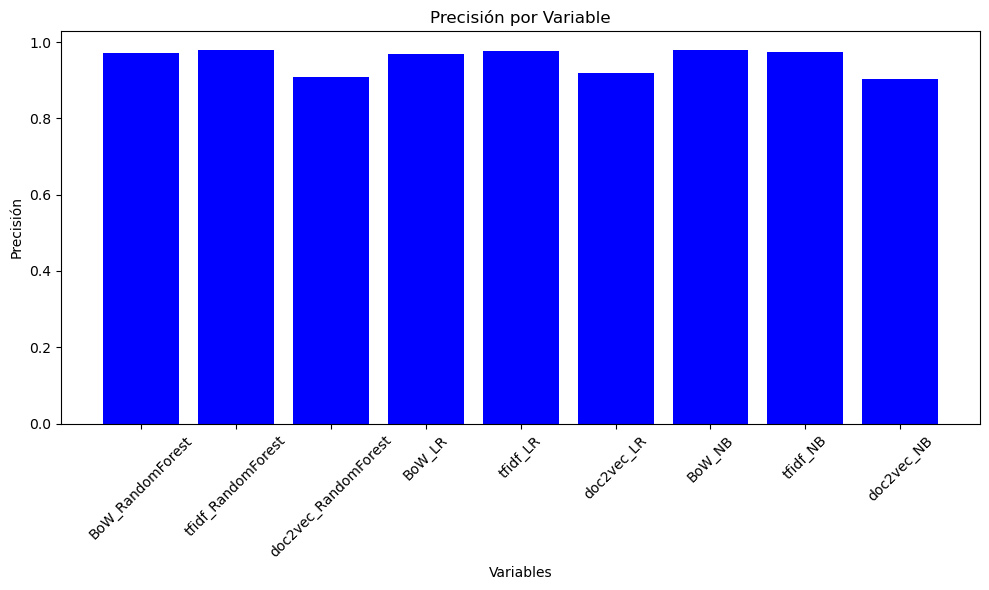

In [52]:
variables = ["BoW_RandomForest", "tfidf_RandomForest", "doc2vec_RandomForest", "BoW_LR", "tfidf_LR", "doc2vec_LR", "BoW_NB", "tfidf_NB", "doc2vec_NB"]

# Lista de precisiones correspondientes
precisions = [precision_BoW_RandomForest, precision_tfidf_RandomForest, precision_doc2vec_RandomForest, 
              precision_BoW_LR, precision_tfidf_LR, precision_doc2vec_LR, 
              precision_BoW_NB, precision_tfidf_NB, precision_doc2vec_NB]

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar(variables, precisions, color='blue')
plt.xlabel('Variables')
plt.ylabel('Precisión')
plt.title('Precisión por Variable')
plt.xticks(rotation=45)  # Rotar los nombres de las variables para mayor legibilidad
plt.tight_layout()

# Mostrar la gráfica
plt.show()

Como se puede evidenciar, la combinación que arroja las mejores metricas es vectorización por Bag of Words y un algoritmo de Multinomial Naive Bayes.
No resulta impropio que esta haya sido la mejor combinación, pues estas herramientas trabajan bastante bien en conjunto.

* Representación de características: Para comenzar, Bag of Words representa el texto de los documentos como vectores de características donde cada dimensión corresponde a un termino del documento, y Multinominal NB está diseñado para manejar este tipo de datos, haciendolo una elección usual.
* Modelamiento de probabilidades condicionales: Por otro lado, Multinominal NB logra modelar las probabilidades condicionales mediante la probabilidad de encontrar frecuencias de terminos específicas en cada clase, cosa que se alinea con la representación de BoW.
* Manejo de información discreta: Los datos de texto son inherentemente discretos, y tanto BoW como Multinominal NB están diseñados para trabajar con estos datos de conteo discreto.


Otras conclusiones adicionales que se puede obtener de los resultados son:

* Los términos discriminativos, que permiten diferenciar entre las categorías según su frecuencia en un texto con respecto a otros, no están jugando un papel significativo en este conjunto de datos, pues las herramientas anteriormente mencionadas que se enfocan en estos elementos presentaron métricas menos favorables que la mejor.

* Para este conjunto de datos, el contexto de los documentos no es relevante para construir un modelo de clasificación altamente preciso, pues tanto BoW como Multinomial Naive Bayes dejan de lado esta información para enfocarse en la frecuencia de los términos, y aun así fueron el modelo ganador.

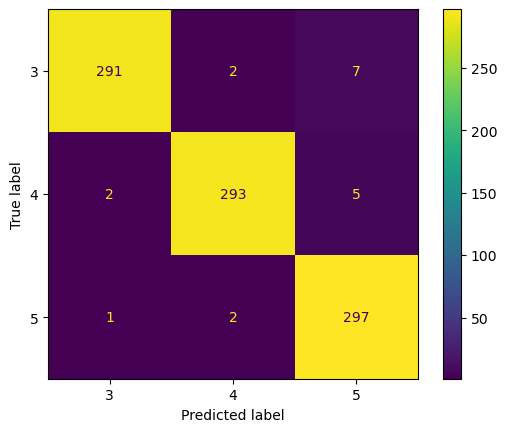

In [53]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bownb_predict)

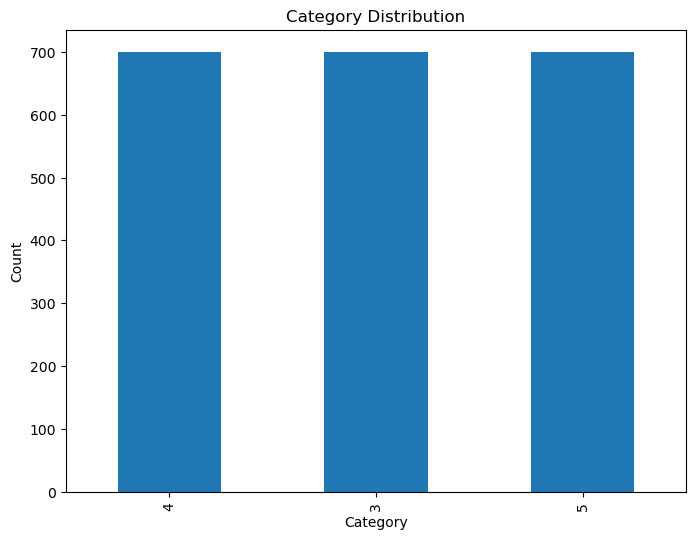

In [61]:
category_counts = pd.Series(y_train).value_counts()
category_counts.plot(kind='bar', figsize=(8, 6))
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Distribution')
plt.show()

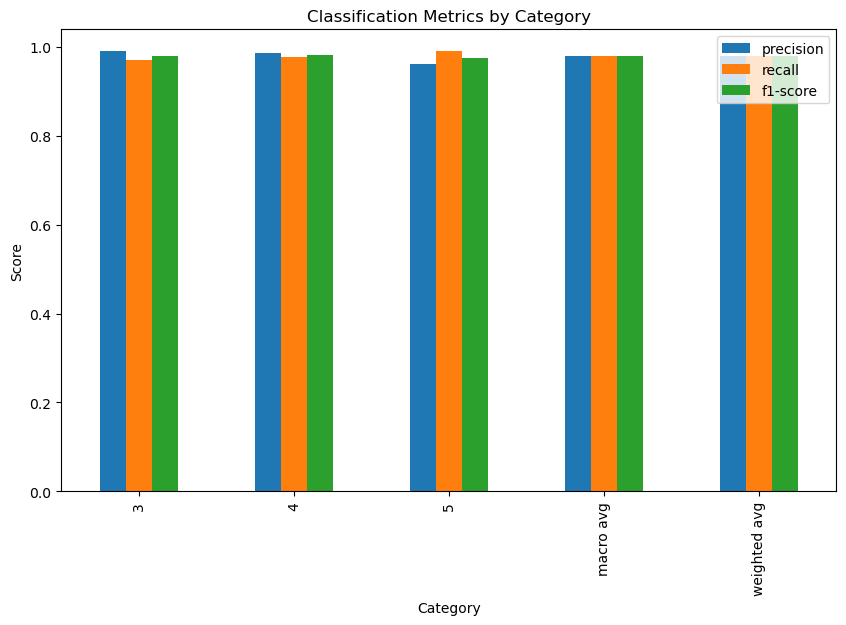

In [64]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
categories =[3,4,5]
report = classification_report(y_test, y_test_bownb_predict, target_names=categories, output_dict=True)
df = pd.DataFrame(report).T
df.drop('support', axis=1, inplace=True)
df.drop('accuracy', axis=0, inplace=True)
df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Category')
plt.ylabel('Score')
plt.title('Classification Metrics by Category')
plt.show()

## Construcción del Pipeline con el modelo ganador, y predicción de etiquetas de un nuevo archivo

In [54]:
class lecturaDatos(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
        
    def transform(self, archivocsv, y=None):
        data=pd.read_excel(archivocsv)
        return data

class limpiezayTokenDatos(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
        
    def transform(self, data, y=None):
        data['palabras'] = data['Textos_espanol'].apply(word_tokenize).apply(preprocessing)
        return data
    
class normalizacion(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
        
    def transform(self, data, y=None):
        data['palabras'] = data['palabras'].apply(stem_and_lemmatize) #Aplica lematización y Eliminación de Prefijos y Sufijos.
        return data
    
class seleccion(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
        
    def transform(self, data, y=None):
        data['palabras'] = data['palabras'].apply(lambda x: ' '.join(map(str, x)))
        return data
    

pipeLimpieza = Pipeline(
    steps=[
        ("Lectura", lecturaDatos()),
        ("Limpieza", limpiezayTokenDatos()),
        ("Normalizacion", normalizacion()),
        ("Seleccion", seleccion()),
    ]
)

In [55]:
from sklearn.feature_extraction.text import TfidfTransformer 

pipeMultinomialNB = Pipeline(
    steps=[
        ('vect', CountVectorizer(stop_words=stop_words)),
        ("Modelo", MultinomialNB())
    ]
)

In [56]:
data = pipeLimpieza.fit_transform("cat_345.xlsx")
data


,Textos_espanol,sdg,palabras
0,"Por ejemplo, el nÃºmero de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparaciÃ³n con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la poblaciÃ³n ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El nÃºmero de recetas que no pudieron ser surtidas en su totalidad por un farmacÃ©utico debido a la falta de existencias es de 33% dentro del SP en comparaciÃ³n con 14% dentro del IMSS segÃºn los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas mÃ¡s altas de recetas surtidas). Ambas cifras se encuentran entre las mÃ¡s altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",3,ejemplo naomero consulta externa especialista trescientos diecinueve cad mil derechohaby sp comparacia3n trescientos treinta y ocho seiscientos veinte cad mil derechohaby imss issst respectiva si bien diferencia pued reflej necesidad desig poblacia3n ligera may issst pued justificars maner naomero receta pudieron ser surtida totalidad farmacautico debido falt existencia treinta y tres dentro sp comparacia3n catorc dentro imss segaon dato encuest aunqu propia cifra instituto ss sugy tasa mas alta receta surtida amba cifra encu mas alta ocd gasto bolsillo reducido significativa ultim decad pes esfuerzo logr cobertur sanitar univers trav reform sp ejemplo naomero consultas externas especialistas trescientos diecinueve cada mil derechohabientes sp comparacia3n trescientos treinta y ocho seiscientos veinte cada mil derechohabientes imss issste respectivamente si bien diferencias pueden reflejar necesidad desigual poblacia3n ligeramente mayor issste pueden justificarse manera naomero recetas pudieron ser surtidas totalidad farmacautico debido falta existencias treinta y tres dentro sp comparacia3n catorce dentro imss segaon datos encuesta aunque propias cifras institutos ss sugieren tasas mas altas recetas surtidas ambas cifras encuentran mas altas ocde gasto bolsillo reducido significativamente ultima decada pesar esfuerzos lograr cobertura sanitaria universal traves reforma sp
1,"En 2007, el gobierno central financió directamente solo el 0,3% del gasto total en salud, pero realizó transferencias específicas para el gasto en salud que ascendieron a otro 5,6% del gasto total. La mayor parte del gasto presupuestario en salud lo realizan los gobiernos de los condados. Por lo tanto, los condados pobres solo pueden ofrecer un bajo nivel de atención a la población local. El gobierno provincial proporciona subsidios del lado de la oferta a los hospitales.",3,dos mil siete gobierno cent financio directa solo 03 gasto tot salud realizo transferencia especifica gasto salud ascendieron 56 gasto tot may part gasto presupuestario salud real gobierno condado condado pobr solo pued ofrec bajo nivel at poblac loc gobierno provint proporcion subsidio lado ofert hospit dos mil siete gobierno central financio directamente solo 03 gasto total salud realizo transferencias especificas gasto salud ascendieron 56 gasto total mayor parte gasto presupuestario salud realizan gobiernos condados condados pobres solo pueden ofrecer bajo nivel atencion poblacion local gobierno provincial proporciona subsidios lado oferta hospitales
2,"Claramente, hay muchos otros factores en juego, en particular, una variedad de barreras y determinantes sociales. Estos pueden estar relacionados con el género, la clase, la etnia, la casta, el idioma y la religión, y surgen de estructuras, normas y procesos sociales arraigados que aceptan e incluso fomentan distribuciones injustas de la riqueza y los recursos sociales. Por ejemplo, las personas que viven con el VIH y algunas otras enfermedades crónicas enfrentan altos n

In [57]:
X_train, X_test, y_train, y_test = train_test_split(data["palabras"], data["sdg"], test_size=0.3, stratify=data["sdg"], random_state=1)

In [58]:
pipeMultinomialNB.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(stop_words=['de', 'la', 'que', 'el', 'en', 'y',
                                             'a', 'los', 'del', 'se', 'las',
                                             'por', 'un', 'para', 'con', 'no',
                                             'una', 'su', 'al', 'lo', 'como',
                                             'más', 'pero', 'sus', 'le', 'ya',
                                             'o', 'este', 'sí', 'porque', ...])),
                ('Modelo', MultinomialNB())])

In [59]:
data_new = pipeLimpieza.fit_transform("prueba.xlsx")
data_new

,Textos_espanol,sdg,palabras
0,"Se basa en los nueve años de educación básica (seis de primaria y tres de secundaria). Los alumnos que acceden al segundo ciclo de secundaria pueden ir a un centro de orientación más académica o a un centro de formación profesional. Esto se aplica tanto en el sistema islámico como en el no islámico. La enseñanza secundaria superior formal comprende la enseñanza general (sekolah menengah atas, o SMA), la enseñanza profesional (sekolah menengah kejuruan, o SMK), las escuelas secundarias superiores islámicas (madrasah aliyah, o MA) y la enseñanza profesional islámica (madrasah aliyah kejuruan, o MAK). Este capítulo se centra principalmente en la enseñanza secundaria superior académica, mientras que el capítulo 5 trata de la formación profesional. Se está trabajando en el desarrollo de colegios comunitarios y vías alternativas de acceso a la enseñanza superior.",NaN,bas nuev ano educac basic sei primar tre secundar alumno acc segundo ciclo secundar pued ir centro orientac mas academic centro formac profes aplic sistem islamico islamico ensenanz secundar supery form comprend ensenanz gen sekolah menengah ata sma ensenanz profes sekolah menengah kejuru smk escuela secundaria supery islamica madrasah aliyah ma ensenanz profes islamic madrasah aliyah kejuru mak capitulo centr princip ensenanz secundar supery academic mientra capitulo cinco trat formac profes trabajando desarrollo colegio comunitario via alternativa acceso ensenanz supery basa nueve anos educacion basica seis primaria tres secundaria alumnos acceden segundo ciclo secundaria pueden ir centro orientacion mas academica centro formacion profesional aplica sistema islamico islamico ensenanza secundaria superior formal comprende ensenanza general sekolah menengah atas sma ensenanza profesional sekolah menengah kejuruan smk escuelas secundarias superiores islamicas madrasah aliyah ma ensenanza profesional islamica madrasah aliyah kejuruan mak capitulo centra principalmente ensenanza secundaria superior academica mientras capitulo cinco trata formacion profesional trabajando desarrollo colegios comunitarios vias alternativas acceso ensenanza superior
1,"En la última década, y en particular desde 2010, el número de altas per cápita ha tendido a disminuir, y ahora está en línea con la media de la OCDE mencionada anteriormente. Por ejemplo, los habitantes de zonas rurales representan el 43% de la población, pero sólo el 32% de las altas hospitalarias. A falta de información complementaria, no es posible determinar si esta diferencia indica o no disparidades en el acceso de las poblaciones rurales y, en caso afirmativo, si las causas son geográficas, culturales o infraestructurales. No parece que se recojan datos sobre el acceso a la atención desde el punto de vista del paciente, lo que ayudaría a comprender la naturaleza de los obstáculos al acceso (y las soluciones). En general, no es posible determinar con los datos disponibles si los ingresos o las características socioeconómicas de los pacientes influyen a la hora de llegar a las puertas del hospital o de ser ingresado. El acceso desigual probablemente se deba también a la incapacidad de los centros de las distintas regiones para prestar los mismos servicios.",NaN,ultim decad particul dos mil diez numero alta per capit tendido disminuir ahor line med ocd mencionad antery ejemplo habit zona rur repres cuarenta y tres poblac solo treinta y dos alta hospitalaria falt informac complementar pos determin si diferenc indic disparidad acceso poblac rur caso afirmativo si causa geografica cult infraestruct parec recod dato acceso at punto vist pacy ayudar comprend naturalez obstaculo acceso soluc gen pos determin dato dispon si ingreso caracteristica socioeconomica pacy influy hor lleg puerta hospit ser ingresado acceso desig prob deb tamby incapacidad centro distinta reg prest mismo servicio ultima decada particular dos mil diez numero altas per capita tendido disminuir ahora linea media ocde mencionad

In [60]:
predictions = pipeMultinomialNB.predict(data_new["palabras"])

import csv

with open('Predicciones.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    for prediction in predictions:
      writer.writerow([prediction])


## Analisis de Actores

| Rol dentro de la empresa | Tipo de actor | Beneficio                                               | Riesgo                                                                               |
|--------------------------|--------------|--------------------------------------------------------|--------------------------------------------------------------------------------------|
| UNFPA                    | Usuario      | Apoya la labor de evaluar las políticas implementadas e identificar los impactos que tienen en las poblaciones | Si se tiene un modelo erróneo, puede identificarse un testimonio o declaración de un ODS diferente al que se trata en realidad y esto conducirá a conclusiones equivocadas |
| Gobierno nacional        | Proveedor    | Revisa y garantiza que los programas implementados estén funcionando correctamente y generen beneficios en la población colombiana | Si se da un mal manejo puede traer consecuencias negativas para la población y generar problemas en el país |
| Población                | Beneficiado  | Recibe ayuda de los programas financiados por la ONU donde se busca que tengan mejores condiciones de salud, educación e igualdad | Si se implementan los programas de manera incorrecta esto puede traer consecuencias económicas y sociales graves en la población |
| ONU                      | Financiador  | Ayuda a identificar los proyectos que tienen mayor impacto positivo e invertir más dinero en estos proyectos y similares | Si el modelo está equivocado puede invertir en proyectos que no están dando resultados positivos y estar gastando dinero en vano |
